In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../workstatation")
from imitation_learning.linear_regression import DMPTrajectory, load_data
from utils.trajectory_utils import truncate_expert_data

In [3]:
expert_data = load_data("../data/traj_cut_Dec_7_12_30_AM/h5/expert_traj.h5")
truncated_expert_data = truncate_expert_data(expert_data)
num_dims, num_basis, num_sensors = 7, 19, 10
dmp_traj = DMPTrajectory(num_dims, num_basis, num_sensors)
X, y = [], []
for k in sorted(expert_data.keys()):
    data = dmp_traj.convert_data_to_dmp_train_format(
            truncated_expert_data[k])
    assert type(data['X']) is np.ndarray \
        and type(data['y']) is np.ndarray, "Incorrect data type returned"
            
    X.append(data['X'])
    y.append(data['y'])

X, y = np.vstack(X), np.vstack(y)
train_size = int(X.shape[0] * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

clf = dmp_traj.train(X_train, y_train, X_test, y_test, use_ridge=True)

y, dy = dmp_traj.run_dmp_with_weights(clf.coef_.copy().squeeze(),
                                      np.zeros((dmp_traj.num_dims)),
                                      0.05,
                                      traj_time=100)

Traj start: 24, end: 115
Traj start: 45, end: 143
Traj start: 25, end: 115
Traj start: 21, end: 116
Traj start: 38, end: 127
Traj start: 58, end: 132
Traj start: 42, end: 108
Traj start: 26, end: 108
Mean: [1.   0.97 0.95 0.92 0.89 0.87 0.85 0.82 0.8  0.78 0.76 0.74 0.72 0.7  0.68 0.66 0.64 0.62 0.61]
Std: [1024.94 1083.49 1145.39 1210.82 1279.99 1353.12 1430.42 1512.13 1598.52 1689.84 1786.37 1888.42
 1996.31 2110.35 2230.91 2358.36 2493.08 2635.51 2635.51]
Mean: [1.   0.97 0.95 0.92 0.89 0.87 0.85 0.82 0.8  0.78 0.76 0.74 0.72 0.7  0.68 0.66 0.64 0.62 0.61]
Std: [1024.94 1083.49 1145.39 1210.82 1279.99 1353.12 1430.42 1512.13 1598.52 1689.84 1786.37 1888.42
 1996.31 2110.35 2230.91 2358.36 2493.08 2635.51 2635.51]
Score (max 1.0) Train: 0.008, Test-0.004


In [15]:
def visualize_dmp_trajectories(ys):
    for i in range(7):
        plt.plot(y[:,i])
        plt.show()

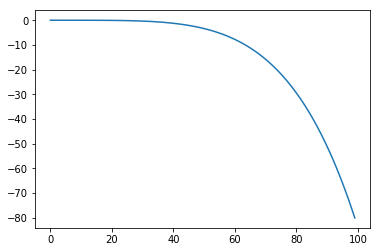

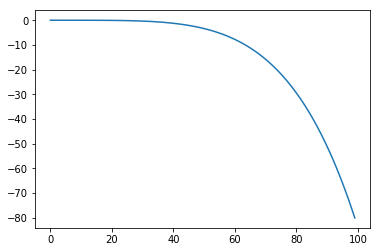

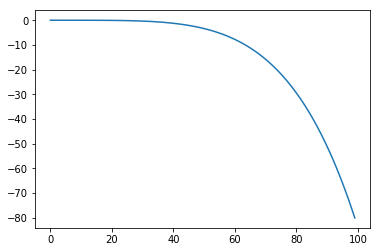

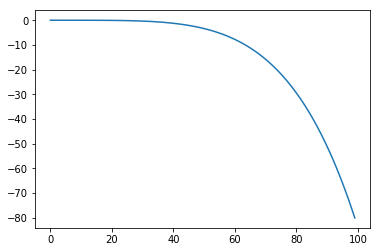

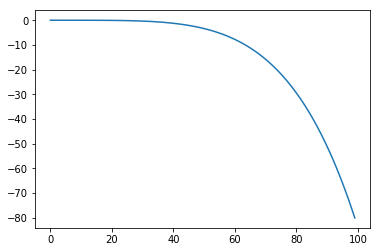

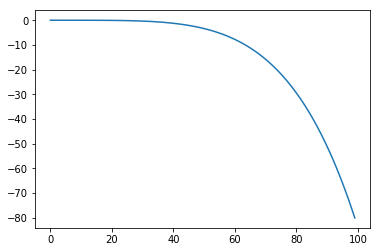

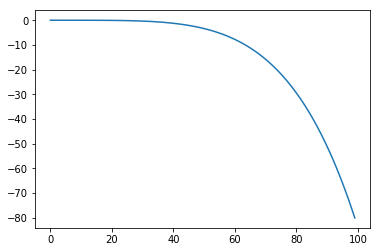

In [16]:
visualize_dmp_trajectories(y)

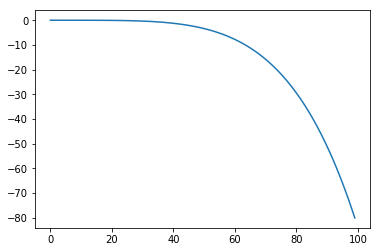

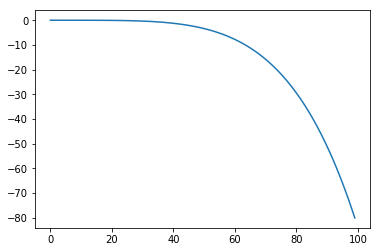

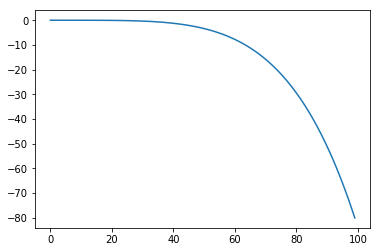

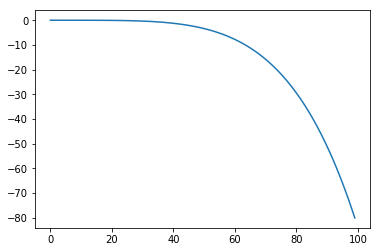

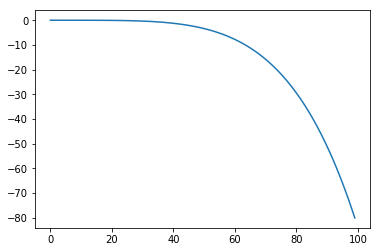

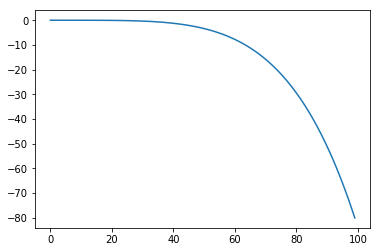

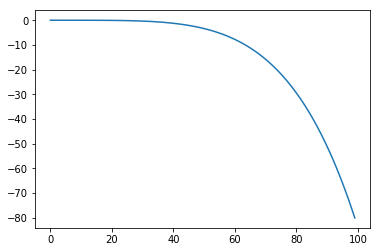

In [17]:
visualize_dmp_trajectories(dy)